# Does Aya "think" in English first? Using FLORES-200 dataset

Description:
* How English-centric is Aya compared to other models?
* Method: Measure frequency of English-first reasoning across different tasks.
* Evaluation: Ratio of English-first vs. direct language reasoning.
* Input: Cross-lingual reasoning tasks.
* Output: Statistical trend in language processing.
* Expected Insight: If Aya frequently defaults to English-first processing, its multilingual representation may be biased.

This notebook `.ipynb` aims to do analysis on the `results/flores200_first_n_tokens_results` result from the `experiments/first_n_tokens_experiment` experiment.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
result_df = pd.read_csv("../results/flores200_first_n_tokens_results.csv")

In [45]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   row_index                          5100 non-null   int64 
 1   original_lang                      5100 non-null   object
 2   original_script                    5100 non-null   object
 3   original_sentence                  5100 non-null   object
 4   generated_first_n_tokens_sentence  5100 non-null   object
 5   detected_lang                      5055 non-null   object
 6   detected_script                    5100 non-null   object
 7   is_english                         5100 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 284.0+ KB


In [46]:
print(f"Loaded {len(result_df)} rows.")
result_df.head()

Loaded 5100 rows.


,row_index,original_lang,original_script,original_sentence,generated_first_n_tokens_sentence,detected_lang,detected_script,is_english
0,0,ace,Arab,"""کامو جينو نا تيكويه عمو ٤ بولن ڽڠ هانا ديابيت...",ترجمه این متن از زبان محلی به فارسی به این صور...,fas,UNKNOWN,False
1,1,ace,Arab,در. ايهود اور، ڤروفيسور کدوکترن بق يونيۏرسيتس ...,در. ايهود اور یک پروفسور دکترا و متخصص در زمین...,fas,UNKNOWN,False
2,2,ace,Arab,لݢى لادوم اورڠ چاروڠ لاءينجيه، غوبڽن راݢو ڤکوه...,لغت و معنى این جمله به زبان اردو به شرح زیر اس...,fas,UNKNOWN,False
3,3,ace,Arab,بق اورو سنين، سارا دانيوس، سيکريتاريس تتڤ کومي...,برای سال‌های طولانی، سارا دانیوس، دبیر کمیته ن...,fas,UNKNOWN,False
4,4,ace,Arab,"دانيوس خن، ""جينو كامو هان مبوت سڤو. لون کا لون...",يبدو أن النص الذي قدمته مكتوب بلغة غير معروفة ...,ara,UNKNOWN,False


In [47]:
# Check basic statistics: how often Aya's first few tokens are detected as English
english_first_ratio = result_df["is_english"].mean()
print(f"English-First Ratio: {english_first_ratio:.4f} ({english_first_ratio*100:.2f}%)")

English-First Ratio: 0.1500 (15.00%)


The **English-First Ratio of 15%** indicates that **Aya rarely defaults to English** when processing cross-lingual tasks. This suggests that while Aya is capable of handling various languages, English does not dominate as the first language in its reasoning. This is a relatively **low English-centric bias**, implying that Aya may have **a more balanced multilingual processing** capability.


In [ ]:
# Breakdown by original language and the script
result_df["original_lang_script"] = result_df["original_lang"] + "_" + result_df["original_script"]
lang_breakdown = result_df.groupby("original_lang_script")["is_english"].mean().sort_values(ascending=False)
pd.DataFrame(lang_breakdown)

,is_english
original_lang_script,
eng_Latn,1.00
sat_Olck,1.00
taq_Tfng,0.96
tzm_Tfng,0.96
tir_Ethi,0.92
...,...
ukr_Cyrl,0.00
vie_Latn,0.00
urd_Arab,0.00


In this table, we observe that **certain languages like 'eng' (English) and 'sat' (Sundanese)** have an **English-First Ratio of 1.00**, meaning Aya **always** defaults to English reasoning for these languages. However, languages such as **tgk**, **vie**, and **urd** have an English-first ratio of **0.00**, indicating that **Aya processes them directly in their respective languages**, without an English intermediary. This reveals that Aya has **varying tendencies** in language processing, with some languages exhibiting a strong bias towards English and others processing directly in the input language.


In [49]:
# Count how many total examples we have per original language
lang_counts = result_df["original_lang_script"].value_counts()
pd.DataFrame(lang_counts)

,count
original_lang_script,
ace_Arab,25
ace_Latn,25
acm_Arab,25
acq_Arab,25
aeb_Arab,25
...,...
yue_Hant,25
zho_Hans,25
zho_Hant,25


The table displays the **sample size** for each language in the dataset. All languages have **exactly 25 samples**, ensuring a uniform basis for comparison. This consistency helps maintain the robustness of metrics such as the English-first ratio, as variability in sample sizes could otherwise introduce bias in languages with fewer examples.

In [50]:
# Merge counts with English-first ratio safely
lang_stats = pd.concat([
    lang_breakdown.rename("english_first_ratio"),
    lang_counts.rename("sample_size")
], axis=1).reset_index().rename(columns={"index": "original_lang_script"})

# Display the merged result
lang_stats = lang_stats.sort_values(by="english_first_ratio", ascending=False)
lang_stats

,original_lang_script,english_first_ratio,sample_size
0,eng_Latn,1.00,25
1,sat_Olck,1.00,25
2,taq_Tfng,0.96,25
3,tzm_Tfng,0.96,25
4,tir_Ethi,0.92,25
...,...,...,...
199,ukr_Cyrl,0.00,25
200,vie_Latn,0.00,25
201,urd_Arab,0.00,25
202,ydd_Hebr,0.00,25


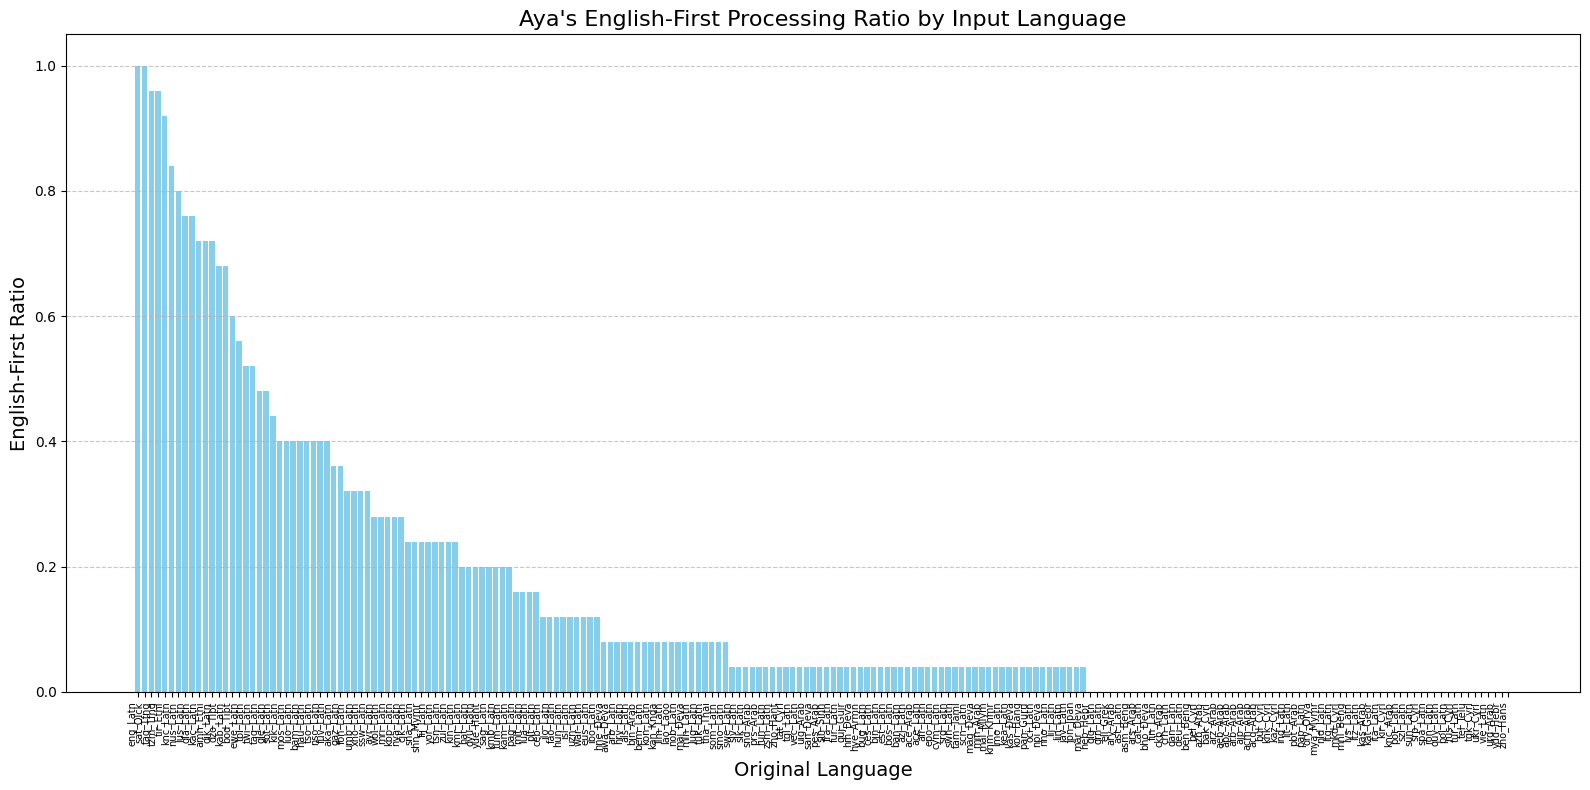

In [51]:
# Plotting English-first ratio per language
plt.figure(figsize=(16, 8))
plt.bar(lang_stats["original_lang_script"], lang_stats["english_first_ratio"], color="skyblue")
plt.xlabel("Original Language", fontsize=14)
plt.ylabel("English-First Ratio", fontsize=14)
plt.title("Aya's English-First Processing Ratio by Input Language", fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
# Overall English-First Conclusion
threshold = 0.5  # Arbitrary: if >50% English-first, consider strongly English-centric
strong_english_centric_langs = lang_stats[lang_stats["english_first_ratio"] > threshold]

print("Languages where Aya often thinks in English first (>50% English-first ratio):")
strong_english_centric_langs

Languages where Aya often thinks in English first (>50% English-first ratio):


,original_lang_script,english_first_ratio,sample_size
0,eng_Latn,1.00,25
1,sat_Olck,1.00,25
2,taq_Tfng,0.96,25
3,tzm_Tfng,0.96,25
4,tir_Ethi,0.92,25
5,knc_Latn,0.84,25
6,nus_Latn,0.80,25
7,lus_Latn,0.76,25
8,gla_Latn,0.76,25
9,kac_Latn,0.72,25


Languages like **English**, **Santhali (sat)**, **Tamasheq (taq)**, and **Berber (tzm)** exhibit a very high **English-First Ratio (1.00 or close)**, meaning Aya predominantly reasons in English for these languages. In fact, some languages like **Tigrinya (tir)** with a ratio of **0.92** and **Ghanaian Twi (twi)** with a ratio of **0.52** show a trend of English being the first language used for reasoning. These results suggest that Aya **leans towards English-first processing** for certain languages, while **other languages** like **Dzongkha (dzo)** and **Kabyle (kab)** show moderate but still noticeable English influence. Aya appears to process these languages **with varying degrees of English influence**, particularly when the language structure is more complex or less directly represented in the model.

# ✨ **Summary Conclusion:**

- Aya exhibits a **low English-centric bias overall**, with an **English-First Ratio of just 15%**. This implies Aya does not default to English processing for most languages.
- However, there is **significant variation** across languages. Some languages, like **English (eng)** and **Santhali (sat)**, show a **strong English-first preference** (ratio of 1.00), while others like **Tigrinya (tir)** and **Ghanaian Twi (twi)** are more **balanced**.
- Aya tends to **default to English first** in languages that are either more closely related to English or have more **similar linguistic structures**.
- **Aya’s multilingual processing is not entirely neutral** and is influenced by the structure and representation of each language within the model.

### 🎯 **Main Question Answer:**
> **Does Aya "think" in English first?**  
>  
> ❌ **No, Aya does **not consistently "think" in English first**.**  
>  
> While some languages do show a strong English-first processing bias—such as English and Santhali—the overall English-First Ratio is just **15%**, indicating that Aya defaults to English in only a small portion of cases. This suggests that Aya generally **processes languages more directly** rather than translating everything through English, though certain structural similarities or training data imbalances can still lead to English-first tendencies in specific languages.